#### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy().astype(np.float64)
for i in range (1, len(X_st)):
    X_st[i] = calc_std_feat(X[i])

print(X_st[1])
print(X_st[2])
print(X_st[3])

[-0.57142857 -0.57142857 -0.21428571 -0.57142857  0.14285714 -0.92857143
  0.85714286  2.64285714 -0.57142857 -0.21428571]
[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
w = np.linalg.inv(X_st @ X_st.T) @ X_st @ y
w[1:] 

array([6.12241513, 1.42846588, 4.11637116])

In [7]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

#### Введем массив значений $\lambda$ - $lam = [0.1, 0.0001, 0.000001]$ и рассчитаем значения $w_1,\ w_2,\ w_3$ для каждого из значений $\lambda$

In [8]:
lam = [0.1, 0.0001, 0.000001]
w1 = []
w2 = []
w3 = []
for i in range(len(lam)):
    weight = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lam[i])
    w1.append(weight[1])
    w2.append(weight[2])
    w3.append(weight[3])
print(w1, w2, w3)

[3.60580752658091, 3.6643833999087723, 3.6644370055495843] [3.3877761410613587, 3.4814014874666857, 3.48149603266732] [4.215188741324228, 4.46109415256197, 4.461354070078058]


#### Построим графики зависимостей $w_1(\lambda),\ w_2(\lambda),\ w_3(\lambda)$

Text(0, 0.5, 'lambda')

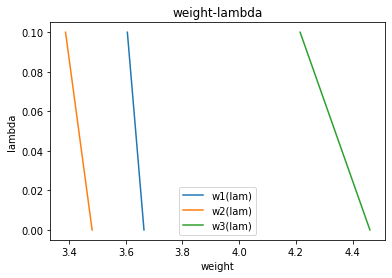

In [9]:
plt.plot(w1, lam, label = 'w1(lam)')
plt.plot(w2, lam, label = 'w2(lam)')
plt.plot(w3, lam, label = 'w3(lam)')
plt.legend()
plt.title('weight-lambda')
plt.xlabel('weight')
plt.ylabel('lambda')

#### На графиках видим, что чем больше $\lambda$, тем меньше вес признака.

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

#### Можно применить и нормализацию, и стандартизацию (отдельно), чтобы создать отмасштабированные копии набора данных и сравнить друг с другом полученные результаты для того, чтобы определить, какой из методов масштабирования подходит больше в конкретной ситуации.

#### 3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [10]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) # производная от |w| = sign(w)
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [11]:
eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3)

array([49.71438487,  3.66443755,  3.48149699,  4.46135669])